## Entregas a Kaggle por API

> Evaluación del umbral óptimo según puntaje público

Debe correr con un entorno específico "kaggle_env"

In [51]:
# !pip install --upgrade pip setuptools
# !pip install kaggle
# !pip install requests
# !pip install charset-normalizer
# !pip install pandas
# !pip install seaborn

In [52]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import time

In [ ]:
df_probas = pd.read_csv('predicciones/probas_pred_xgb_03_tr12_sem25_01T-12-202413-28-56.csv')

df_probas.drop(columns='proba_sem_mean', inplace=True)

numero_de_cliente = df_probas.client

df_probas

,client,proba_s217170,proba_s226775,proba_s236380,proba_s245985,proba_s255590,proba_s265195,proba_s274800,proba_s284405,proba_s294010,...,proba_s370850,proba_s380455,proba_s390060,proba_s399665,proba_s409270,proba_s418875,proba_s428480,proba_s438085,proba_s447690,pred
0,563965491,0.000990,0.001111,0.001159,0.001290,0.001200,0.001157,0.001181,0.001000,0.001132,...,0.001428,0.001150,0.001054,0.001137,0.001022,0.001257,0.001030,0.001131,0.001059,0
1,549490342,0.001069,0.000947,0.001029,0.001047,0.000986,0.001098,0.000984,0.000971,0.000950,...,0.000988,0.001293,0.001061,0.001277,0.000969,0.001132,0.001081,0.000973,0.001054,0
2,683742283,0.000865,0.000822,0.000745,0.000805,0.000998,0.000862,0.000865,0.000831,0.000939,...,0.000849,0.000785,0.000835,0.001048,0.000734,0.000749,0.000787,0.000826,0.000745,0
3,281174976,0.000898,0.000847,0.000727,0.000994,0.001216,0.001045,0.000918,0.000898,0.001174,...,0.000923,0.000909,0.000860,0.000939,0.001053,0.000962,0.000837,0.000993,0.001146,0
4,725868971,0.000265,0.000245,0.000284,0.000251,0.000316,0.000247,0.000286,0.000235,0.000267,...,0.000230,0.000261,0.000246,0.000286,0.000272,0.000232,0.000293,0.000279,0.000273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165639,462836438,0.001088,0.000973,0.001008,0.000925,0.000849,0.000922,0.001014,0.000979,0.001023,...,0.000998,0.000922,0.000975,0.001012,0.000947,0.000876,0.001168,0.000848,0.000972,0
165640,251039253,0.000316,0.000297,0.000289,0.000247,0.000322,0.000331,0.000271,0.000286,0.000309,...,0.000309,0.000350,0.000276,0.000332,0.000313,0.000329,0.000277,0.000315,0.000303,0
165641,574092070,0.005709,0.005197,0.005850,0.005258,0.004790,0.006389,0.005437,0.004541,0.007107,...,0.006070,0.004869,0.004967,0.006194,0.005792,0.005889,0.004547,0.005683,0.005680,0
165642,850214863,0.000606,0.000552,0.000625,0.000543,0.000490,0.000538,0.000507,0.000439,0.000510,...,0.000533,0.000534,0.000584,0.000602,0.000483,0.000641,0.000536,0.000544,0.000515,0


In [ ]:
proba_columns = df_probas.filter(regex='^proba_s').columns

# Define 10 thresholds
# thresholds = np.linspace(0.0145, 0.0175, 10)
thresholds = np.linspace(0.0165, 0.0195, 10)

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Initialize lists to store results
results = []

# for i in range(8):
for i in range(7,10):
    # Bootstrap sampling of the 10 columns
    sampled_cols = np.random.choice(proba_columns, size=10, replace=True)
    # Compute mean probability for each client
    proba_mean = df_probas[sampled_cols].mean(axis=1)
    
    # Iterate over thresholds and calculate predictions
    for umbral in thresholds:
        # Calculate predictions
        pred = np.where(proba_mean >= umbral, 1, 0)
        positive_count = np.sum(pred)
        
        # Form the submission DataFrame
        submission = pd.DataFrame({
            'numero_de_cliente': df_probas['client'].values,
            'Predicted': pred
        })
        
        # Save the submission file
        submission_file = f'xgb_comp02_{umbral:.5f}.csv'
        submission.to_csv(submission_file, index=False)
        
        # Prepare submission description and competition name
        description_sub = f'Envio {i} xgb comp02 con threshold {umbral:.5f}'
        competition_name = 'dm-ey-f-2024-tercera'
        
        # Send the submission to Kaggle
        print(f"Enviando submission {i} con threshold {umbral:.5f}...")
        api.competition_submit(submission_file, description_sub, competition_name)
        
        # Wait for the submission to be scored
        print("Esperando a que se califique la submission...")
        time.sleep(10)  # Adjust as needed
        
        # Try to get the score
        score_kaggle = None
        max_wait_time = 30  # Maximum wait time in seconds
        wait_interval = 5  # Time between checks
        total_waited = 0
        
        while total_waited < max_wait_time:
            # Get the list of submissions
            submissions = api.competition_submissions(competition_name)
            # Filter submissions by description
            matching_submissions = [s for s in submissions if s.description == description_sub]
            if matching_submissions:
                last_submission = matching_submissions[0]
                public_score = last_submission.publicScore
                if public_score not in (None, 'None', '--'):
                    try:
                        score_kaggle = float(public_score)
                        print(f"Score obtenido: {score_kaggle}")
                        break  # Exit loop once score is obtained
                    except ValueError:
                        print(f"No se pudo convertir publicScore a float: {public_score}")
                else:
                    print("La submission aún no ha sido calificada. Esperando...")
            else:
                print("No se encontró la submission en la lista de submissions. Esperando...")
            time.sleep(wait_interval)
            total_waited += wait_interval
        
        if score_kaggle is None:
            print("No se obtuvo el score dentro del tiempo máximo de espera.")
        
        # Store results
        results.append({
            'iteration': i,
            'threshold': umbral,
            'positive_count': positive_count,
            'score_kaggle': score_kaggle
        })
        
        # Wait before next iteration to avoid server overload
        time.sleep(3)

# Convert results to DataFrame
kaggle_results = pd.DataFrame(results)

Enviando submission 7 con threshold 0.01650...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.34MB/s]


Esperando a que se califique la submission...
Score obtenido: 124.377
Enviando submission 7 con threshold 0.01683...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.33MB/s]


Esperando a que se califique la submission...
Score obtenido: 122.978
Enviando submission 7 con threshold 0.01717...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.38MB/s]


Esperando a que se califique la submission...
Score obtenido: 124.517
Enviando submission 7 con threshold 0.01750...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 125.777
Enviando submission 7 con threshold 0.01783...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 127.107
Enviando submission 7 con threshold 0.01817...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 128.437
Enviando submission 7 con threshold 0.01850...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 127.037
Enviando submission 7 con threshold 0.01883...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.33MB/s]


Esperando a que se califique la submission...
Score obtenido: 128.437
Enviando submission 7 con threshold 0.01917...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.33MB/s]


Esperando a que se califique la submission...
Score obtenido: 126.897
Enviando submission 7 con threshold 0.01950...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.37MB/s]


Esperando a que se califique la submission...
Score obtenido: 128.647
Enviando submission 8 con threshold 0.01650...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 124.098
Enviando submission 8 con threshold 0.01683...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.37MB/s]


Esperando a que se califique la submission...
Score obtenido: 122.978
Enviando submission 8 con threshold 0.01717...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.38MB/s]


Esperando a que se califique la submission...
Score obtenido: 124.237
Enviando submission 8 con threshold 0.01750...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.35MB/s]


Esperando a que se califique la submission...
Score obtenido: 125.847
Enviando submission 8 con threshold 0.01783...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.31MB/s]


Esperando a que se califique la submission...
Score obtenido: 127.107
Enviando submission 8 con threshold 0.01817...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 125.777
Enviando submission 8 con threshold 0.01850...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.37MB/s]


Esperando a que se califique la submission...
Score obtenido: 127.177
Enviando submission 8 con threshold 0.01883...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 128.367
Enviando submission 8 con threshold 0.01917...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 130.047
Enviando submission 8 con threshold 0.01950...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 128.577
Enviando submission 9 con threshold 0.01650...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.30MB/s]


Esperando a que se califique la submission...
Score obtenido: 121.158
Enviando submission 9 con threshold 0.01683...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.28MB/s]


Esperando a que se califique la submission...
Score obtenido: 123.188
Enviando submission 9 con threshold 0.01717...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.33MB/s]


Esperando a que se califique la submission...
Score obtenido: 124.587
Enviando submission 9 con threshold 0.01750...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.32MB/s]


Esperando a que se califique la submission...
Score obtenido: 126.197
Enviando submission 9 con threshold 0.01783...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.37MB/s]


Esperando a que se califique la submission...
Score obtenido: 127.457
Enviando submission 9 con threshold 0.01817...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.29MB/s]


Esperando a que se califique la submission...
Score obtenido: 125.637
Enviando submission 9 con threshold 0.01850...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.41MB/s]


Esperando a que se califique la submission...
Score obtenido: 126.967
Enviando submission 9 con threshold 0.01883...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.35MB/s]


Esperando a que se califique la submission...
Score obtenido: 125.357
Enviando submission 9 con threshold 0.01917...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.38MB/s]


Esperando a que se califique la submission...
Score obtenido: 126.687
Enviando submission 9 con threshold 0.01950...


100%|██████████| 2.09M/2.09M [00:01<00:00, 1.35MB/s]


Esperando a que se califique la submission...
Score obtenido: 128.577


En una corrida parcial, se probaron umbrales un poco más bajas, con semilleríos de a 7 semillas.

Se juntan ambos resultados, para analizar los umbrales y los estímulos óptimos de ambas corridas.

In [ ]:
kaggle_results_p = pd.read_csv('predicciones/envios_kaggle_xgb_03_tr12_sem25_parcial1.csv',
                               index_col=0)

kaggle_results = pd.concat([kaggle_results,kaggle_results_p])

,iteration,threshold,positive_count,score_kaggle
0,0,0.014500,14564,119.758
1,0,0.014833,14305,121.928
2,0,0.015167,14054,120.598
3,0,0.015500,13816,122.768
4,0,0.015833,13586,124.028
...,...,...,...,...
25,9,0.018167,12203,125.637
26,9,0.018500,12027,126.967
27,9,0.018833,11848,125.357
28,9,0.019167,11680,126.687


In [73]:
# Preparing to plot
# Pivot the DataFrame to have iterations as columns
score_pivot = kaggle_results.pivot(index='threshold', columns='iteration', values='score_kaggle')
score_pivot.columns = [f'score_kaggle_{col}' for col in score_pivot.columns]

stimuli_pivot = kaggle_results.pivot(index='threshold', columns='iteration', values='positive_count')
stimuli_pivot.columns = [f'positive_count_{col}' for col in stimuli_pivot.columns]

In [77]:
score_pivot.head()

,score_kaggle_0,score_kaggle_1,score_kaggle_2,score_kaggle_3,score_kaggle_4,score_kaggle_5,score_kaggle_6,score_kaggle_7,score_kaggle_8,score_kaggle_9
threshold,,,,,,,,,,
0.014500,119.758,119.478,120.178,119.828,116.818,116.888,117.168,NaN,NaN,NaN
0.014833,121.928,121.648,119.268,122.558,119.058,118.988,119.618,NaN,NaN,NaN
0.015167,120.598,121.368,121.228,121.648,121.438,121.438,121.438,NaN,NaN,NaN
0.015500,122.768,123.188,122.628,123.398,123.258,123.188,122.698,NaN,NaN,NaN
0.015833,124.028,124.307,123.818,124.587,121.578,124.657,NaN,NaN,NaN,NaN


In [78]:
stimuli_pivot.head()

,positive_count_0,positive_count_1,positive_count_2,positive_count_3,positive_count_4,positive_count_5,positive_count_6,positive_count_7,positive_count_8,positive_count_9
threshold,,,,,,,,,,
0.014500,14564.0,14600.0,14571.0,14569.0,14573.0,14572.0,14559.0,NaN,NaN,NaN
0.014833,14305.0,14298.0,14325.0,14297.0,14297.0,14298.0,14286.0,NaN,NaN,NaN
0.015167,14054.0,14058.0,14050.0,14050.0,14023.0,14023.0,14040.0,NaN,NaN,NaN
0.015500,13816.0,13801.0,13811.0,13837.0,13789.0,13787.0,13814.0,NaN,NaN,NaN
0.015833,13586.0,13582.0,13615.0,13612.0,13583.0,13587.0,NaN,NaN,NaN,NaN


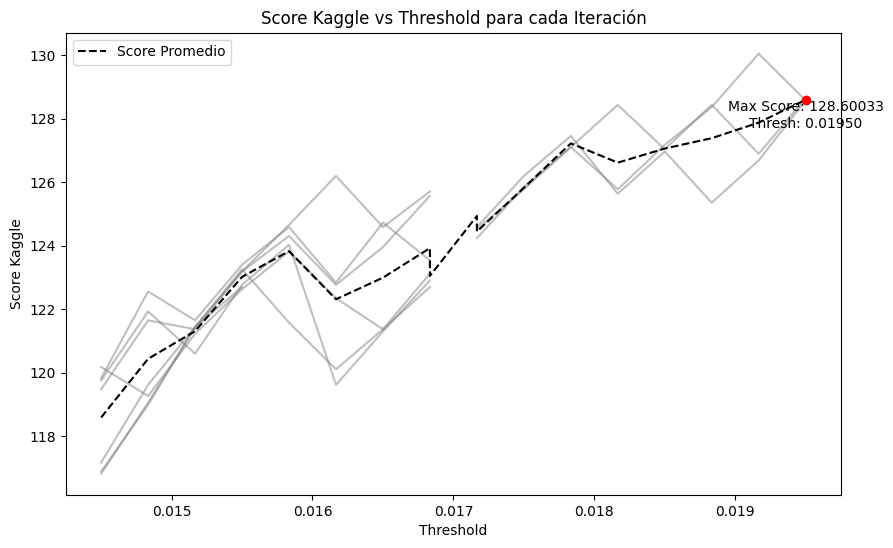

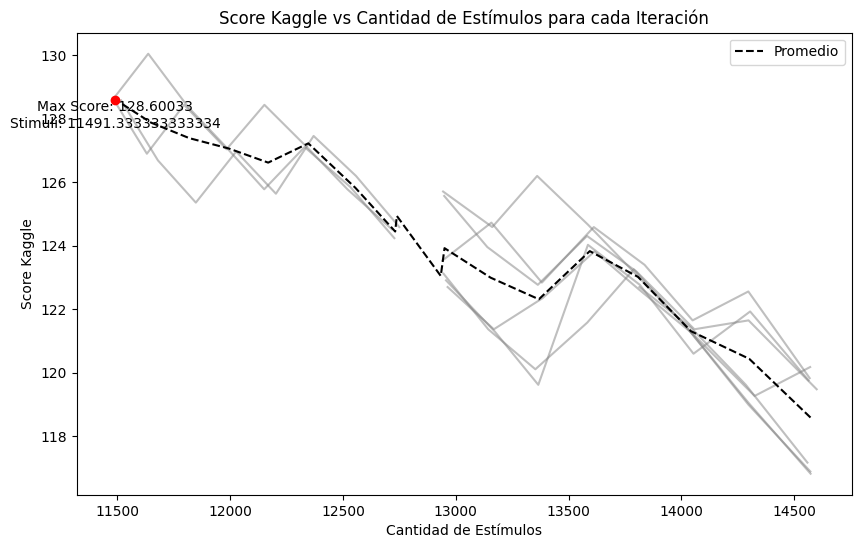

In [76]:
# Plotting Score vs Threshold
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot each iteration in gray
for col in score_pivot.columns:
    ax1.plot(score_pivot.index, score_pivot[col], color='gray', alpha=0.5)

# Calculate and plot average score
score_avg = score_pivot.mean(axis=1)
ax1.plot(score_pivot.index, score_avg, label='Score Promedio', color='black', linestyle='--')

# Highlight maximum average score
max_score_idx = score_avg.idxmax()
max_score_threshold = max_score_idx
max_score = score_avg.loc[max_score_idx]

ax1.scatter(max_score_threshold, max_score, color='red', zorder=5)
ax1.annotate(f"Max Score: {max_score:.5f}\nThresh: {max_score_threshold:.5f}", 
             (max_score_threshold, max_score), textcoords="offset points", xytext=(0,-20), ha='center')

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Score Kaggle')
ax1.legend()
plt.title('Score Kaggle vs Threshold para cada Iteración')
plt.show()

# Plotting Score vs Positive Count (Stimuli)
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot each iteration in gray
for col_score, col_stimuli in zip(score_pivot.columns, stimuli_pivot.columns):
    ax2.plot(stimuli_pivot[col_stimuli], score_pivot[col_score], color='gray', alpha=0.5)

# Calculate and plot average score vs average stimuli
stimuli_avg = stimuli_pivot.mean(axis=1)
ax2.plot(stimuli_avg, score_avg, label='Promedio', color='black', linestyle='--')

# Highlight maximum average score
max_score_stimuli = stimuli_avg.loc[max_score_idx]

ax2.scatter(max_score_stimuli, max_score, color='red', zorder=5)
ax2.annotate(f"Max Score: {max_score:.5f}\nStimuli: {max_score_stimuli}", 
             (max_score_stimuli, max_score), textcoords="offset points", xytext=(0,-20), ha='center')

ax2.set_xlabel('Cantidad de Estímulos')
ax2.set_ylabel('Score Kaggle')
ax2.legend()
plt.title('Score Kaggle vs Cantidad de Estímulos para cada Iteración')
plt.show()

> CONCLUSION:

Parece que un umbral cercano a 0.019, con alrededor de 11500 estímulos, es óptimo para este modelo.

In [79]:
# Promediando proba de cada semilla
proba_s_columns = df_probas.filter(regex='^proba_s')
proba_s_mean = proba_s_columns.mean(axis=1)

df_probas['proba_sem_mean'] = proba_s_mean

# Umbral
thr_opt_k = 0.0195 # segun comp03_kaggle_api_sub

# Prediccion
df_probas['pred'] = np.where(df_probas.proba_sem_mean >= thr_opt_k, 1, 0)

df_probas.head()

,client,proba_s217170,proba_s226775,proba_s236380,proba_s245985,proba_s255590,proba_s265195,proba_s274800,proba_s284405,proba_s294010,...,proba_s380455,proba_s390060,proba_s399665,proba_s409270,proba_s418875,proba_s428480,proba_s438085,proba_s447690,pred,proba_sem_mean
0,563965491,0.000990,0.001111,0.001159,0.001290,0.001200,0.001157,0.001181,0.001000,0.001132,...,0.001150,0.001054,0.001137,0.001022,0.001257,0.001030,0.001131,0.001059,0,0.001150
1,549490342,0.001069,0.000947,0.001029,0.001047,0.000986,0.001098,0.000984,0.000971,0.000950,...,0.001293,0.001061,0.001277,0.000969,0.001132,0.001081,0.000973,0.001054,0,0.001036
2,683742283,0.000865,0.000822,0.000745,0.000805,0.000998,0.000862,0.000865,0.000831,0.000939,...,0.000785,0.000835,0.001048,0.000734,0.000749,0.000787,0.000826,0.000745,0,0.000839
3,281174976,0.000898,0.000847,0.000727,0.000994,0.001216,0.001045,0.000918,0.000898,0.001174,...,0.000909,0.000860,0.000939,0.001053,0.000962,0.000837,0.000993,0.001146,0,0.000958
4,725868971,0.000265,0.000245,0.000284,0.000251,0.000316,0.000247,0.000286,0.000235,0.000267,...,0.000261,0.000246,0.000286,0.000272,0.000232,0.000293,0.000279,0.000273,0,0.000263


In [80]:
submission = pd.DataFrame({
    'numero_de_cliente': numero_de_cliente.values,
    'Predicted': df_probas['pred'].values
})

# Imprimir value counts de las predicciones
value_counts = submission['Predicted'].value_counts()
total_count = len(submission)
print("\nValue Counts:")
print(value_counts)
print("\nFrecuencia Relativa:")
print((value_counts / total_count) * 100)

submission.info()


Value Counts:
Predicted
0    154143
1     11501
Name: count, dtype: int64

Frecuencia Relativa:
Predicted
0    93.056797
1     6.943203
Name: count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165644 entries, 0 to 165643
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   numero_de_cliente  165644 non-null  int64
 1   Predicted          165644 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB


In [81]:
import datetime

ft = "%dT-%m-%Y%H-%M-%S"
t_now = datetime.datetime.now().strftime(ft)

pred_name = f"pred_xgb_comp02_sem25_th{thr_opt_k}"+t_now+".csv"

pred_file = 'predicciones/' + pred_name

# Guardar el DataFrame en un archivo CSV
submission.to_csv(pred_file, index=False)
print(f"Predicciones guardadas en {pred_file}")

Predicciones guardadas en predicciones/pred_xgb_comp02_sem25_th0.019501T-12-202419-27-43.csv


____